# Pipeline : build a classifier
## data processing of the manually annoted dataset
## image processing : extraction of RGB volumes
## classifier based on WND-charm Model
## PCA & RDF
## Analyse False Positives

In [1]:
import numpy as np
import pandas as pd
from functools import partial
import multiprocessing
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as cm

In [2]:
%run ./configure.ipynb

In [3]:
%run ../Connection_to_server.ipynb

## Load the pre-processed Data 

In [4]:
%run ./DF_Pre_Processing_MOINS_Neurons.ipynb

# 1- Pre- processing of Original Data

In [5]:
Data_FRAMES=pd.read_pickle(projectpath+'io/Output/Data_FRAMES.pkl')

In [6]:
%run ./Add_Background_class_to_Dataframe.ipynb

In [7]:
Data_FRAMES=pd.read_pickle(projectpath+'io/Output/Dataframe_.pkl')

# 2- Get volumes with Multiprocessing

In [8]:
%%time
%run ./Get_Partial_Data.ipynb

CPU times: user 72 ms, sys: 4 ms, total: 76 ms
Wall time: 72.8 ms


## Load Normalized volums as numpy array

In [9]:
filename_M_DF =projectpath+'io/Output/M_DF.npy'

In [10]:
M_DF_parallel=np.load(filename_M_DF)

# 3- Display the RGB images corresponding to normalized volums

In [ ]:
%run ./Display_RGB_Vol.ipynb


# 4- WND CHARM Method

## 4.1- Convert RGB images to Grayscale

In [11]:
%%time
%run ./RGB2GRAY.ipynb

CPU times: user 104 ms, sys: 36 ms, total: 140 ms
Wall time: 140 ms


## Load the gray images as numpy array

In [ ]:
filename_Gray_IM =projectpath+'io/Output/GRAY_IM.npy'

In [ ]:
GRAY_IM_parallel=np.load(filename_Gray_IM)

# Display images by class ( 1 or 2)

## 4.2- Extraction of the WND-CHARM Features

In [12]:
%%time
%run ./Features_Exctraction.ipynb

CPU times: user 56 ms, sys: 8 ms, total: 64 ms
Wall time: 62.4 ms


## Load the extracted Features

In [13]:
filename_FEATURES =projectpath+'io/Output/FEATURES.npy'

In [14]:
FEATURES=np.load(filename_FEATURES)

## Etablish one np.array for the Features' Names & another one for Features' Values

In [15]:
FEAT_NAMES=FEATURES[:,1,:]

In [16]:
FEAT_VALUES=FEATURES[:,0,:]

In [17]:
FEAT_VALUES=FEAT_VALUES.astype(float)

In [18]:
filename_FEATURES_Val =projectpath+'io/Output/FEATURES_Val.npy'

In [19]:
np.save(filename_FEATURES_Val,FEAT_VALUES)

In [20]:
FEAT_VALUES=np.load(filename_FEATURES_Val)

# 4.3- Features Post- processing

## A- Get the normalized Features

In [21]:
%%time
%run ./Features_Normalization.ipynb

CPU times: user 32 ms, sys: 20 ms, total: 52 ms
Wall time: 48.3 ms


## Load the Normalized Features values

In [22]:
filename_FVN =projectpath+'io/Output/FV_N.npy'

In [23]:
FV_N=np.load(filename_FVN)

In [24]:
FV_N.shape

(1593, 2919)

# PCA & Random Forest Classification

/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tbacoyannis/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Random_Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=...stimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])


<IPython.core.display.Javascript object>


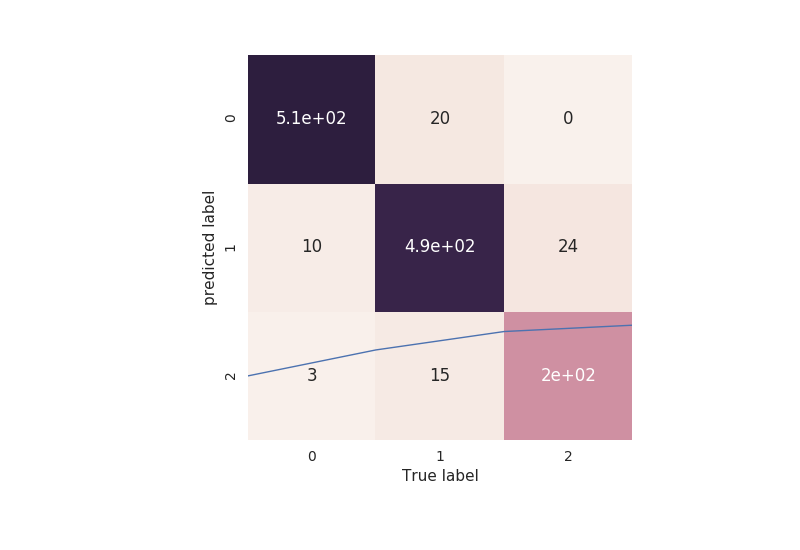

<IPython.core.display.Javascript object>


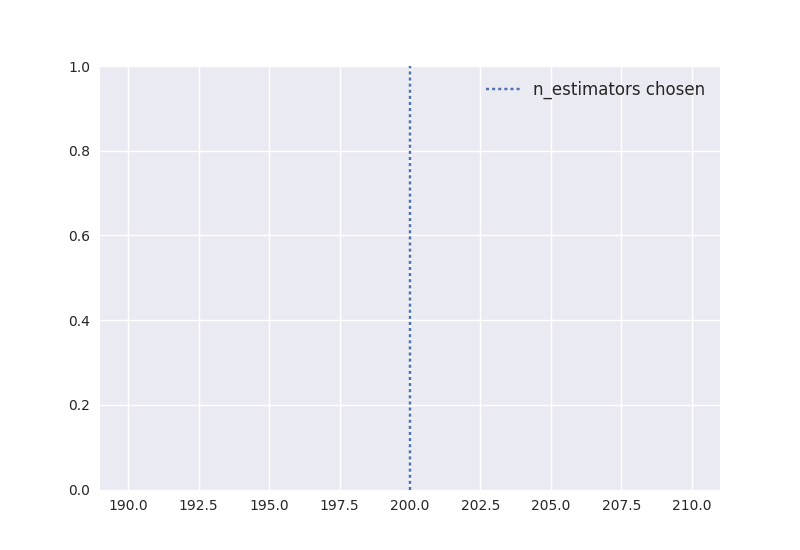

<IPython.core.display.Javascript object>


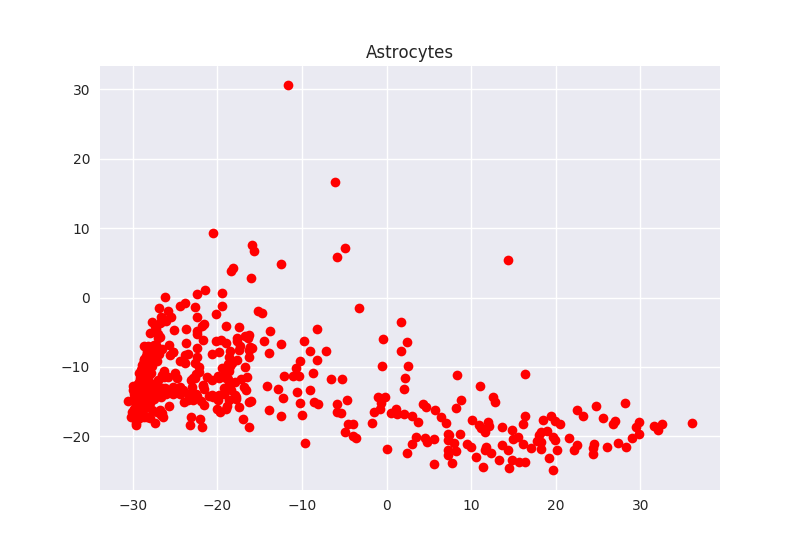

<IPython.core.display.Javascript object>


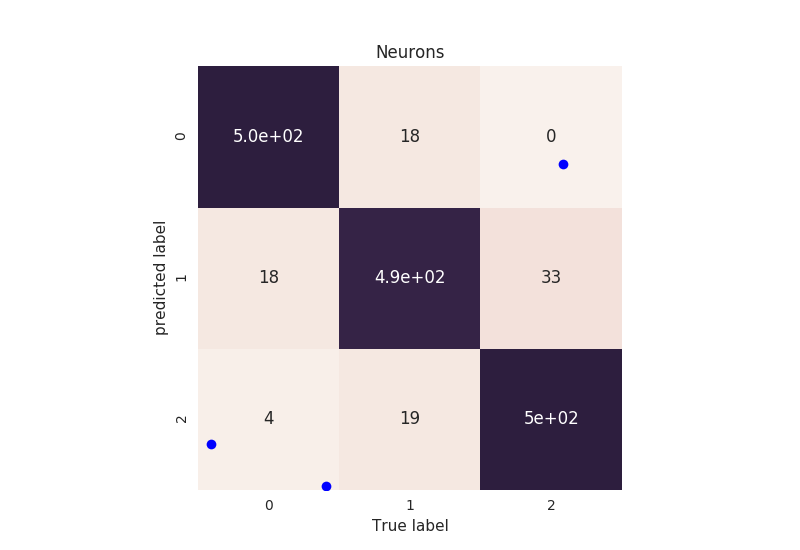

Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Random_Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=...stimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])
CPU times: user 17min 25s, sys: 1h 38s, total: 1h 18min 4s
Wall time: 6min 58s


In [25]:
%%time
%run ./Pipeline_PCA_RANDOM_Forest_Copy1.ipynb
# CPU times: user 16min 53s, sys: 1h 52s, total: 1h 17min 45s
# Wall time: 6min 58s

# Imshow specific images to understand non differentiation in PCA model

# process in order to display false predicted images

# test prediction sur  1 clone

In [26]:
import numpy as np
import pandas as pd
from functools import partial
import multiprocessing
from multiprocessing import Pool
from functools import partial

# FAIRE DES MODIFS !

In [27]:
def get_coordinates(index_ligne,imageId, large):
    conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
    connected = conn.connect()

    image = conn.getObject("Image", imageId)
    pixels = image.getPrimaryPixels() # get raw pixels information
    
    size_x= image.getSizeX()
    size_y= image.getSizeY()
    size_z = image.getSizeZ()
    size_c = image.getSizeC()
    size_t = image.getSizeT()
   
   
    delta_x=int(large/2)
    
    nb_fenetres=np.arange(size_x/delta_x)
    index=nb_fenetres
    
    x=(index*delta_x)+delta_x
    x=x[2:-2]
    y=((index_ligne*delta_x)+delta_x)*np.ones(len(x)) #(index))
    
    
    index_colonne=index+2
    index_lignee=(2+index_ligne)*np.ones(index.shape[0]) # FAUDRA CHANGER PAR index_lignee=(2+index_ligne)*np.ones(len(x))
    
    MATRICE_COORD=(x,y,index_lignee, index_colonne) # RENOMMER CAR C EST TUPLE ET PAS UNE MATRICE
    
    Matrix=np.zeros((len(x),large,large,3))
    
    z=103
    
    tilewidths = np.ones(len(x),dtype=int)*large
    tileheights = tilewidths
    tilestacks = zip(x,y,tilewidths,tileheights)
    
    zstacks= np.ones(len(x),dtype=int)*z
    
    tstacks=np.zeros(len(x), dtype=int)
    
    for c in range(0,3):
        cstacks=np.ones(len(x), dtype=int)*c
        liste=zip(zstacks,cstacks,tstacks, tilestacks)
        pxobj = pixels.getTiles(liste)
        for i, p in enumerate(pxobj):
            Matrix[i,:,:,c]=p
    
    conn._closeSession()
    return(Matrix,MATRICE_COORD)

## STOP

In [28]:
conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
connected = conn.connect()

image = conn.getObject("Image", imageId)
pixels = image.getPrimaryPixels() # get raw pixels information

size_x=image.getSizeX()
size_y=image.getSizeY()
size_z = image.getSizeZ()
size_c = image.getSizeC()
size_t = image.getSizeT()

imageId=451
zsize=3
large= 25  #50
nidX=size_x/int(large/2)

In [29]:
filename_res =projectpath+'io/Output/res.npy'

In [30]:
res=np.load(filename_res)

In [31]:
nn=res

In [32]:
M_Mv=nn[:,0]
liste_coordonnees=nn[:,1]

In [33]:
imag=M_Mv[:]

In [34]:
Matrix_TEST=np.vstack(imag)

In [35]:
Matrix_TEST=Matrix_TEST/255.0

In [36]:
filename_Matrix_TEST =projectpath+'io/Output/Matrix_TEST.npy'

In [37]:
np.save(filename_Matrix_TEST,Matrix_TEST)

In [38]:
%%time
%run ./RGB2GRAY_PREDICT.ipynb
# CPU times: user 1min 11s, sys: 2min 56s, total: 4min 7s
# Wall time: 10min 30s

CPU times: user 36 ms, sys: 604 ms, total: 640 ms
Wall time: 641 ms


In [39]:
filename_GRAY_IM_TEST8PRED =projectpath+'io/Output/GRAY_IM_TEST8PRED.npy'

In [40]:
GRAY_IM_TEST8PRED_parallel=np.load(filename_GRAY_IM_TEST8PRED)

In [41]:
GRAY_IM_TEST8PRED_parallel.shape

(117608, 25, 25)

In [42]:
x_min=48+367
y_min=2064+646
w=615-367
h=920-646
x_max=x_min+w
y_max=y_min+h

In [43]:
b=np.vstack(liste_coordonnees)

In [44]:
x_from_liste_coordonnees=b[:,0]
y_from_liste_coordonnees=b[:,1]
ind_lign_from_liste_coordonnees=b[:,2]
ind_col_from_liste_coordonnees=b[:,3]

In [45]:
coords=np.where((np.hstack(x_from_liste_coordonnees)>=x_min) & (np.hstack(x_from_liste_coordonnees)<=x_max) & (np.hstack(y_from_liste_coordonnees)>=y_min) & (np.hstack(y_from_liste_coordonnees)<=y_max))[0]

In [46]:
filename_GRAY_IM_TEST_PRED =projectpath+'io/Output/GRAY_IM_TEST_PRED.npy'

In [47]:
qq=GRAY_IM_TEST8PRED_parallel[coords]
qq.shape

(483, 25, 25)

In [48]:
GRAY_IM_TEST_PRED_parallel=GRAY_IM_TEST8PRED_parallel[coords]

In [49]:
np.save(filename_GRAY_IM_TEST_PRED,GRAY_IM_TEST_PRED_parallel)

In [50]:
GRAY_IM_TEST8PRED_parallel=np.load(filename_GRAY_IM_TEST_PRED)

In [51]:
GRAY_IM_TEST8PRED_parallel.shape

(483, 25, 25)

In [52]:
%%time
%run ./Features_Exctraction_PREDICT.ipynb
# CPU times: user 19.7 s, sys: 13.6 s, total: 33.3 s
# Wall time: 18min 9s

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 54.7 ms


In [53]:
filename_FEATURES_TEST =projectpath+'io/Output/FEATURES_TEST.npy'

In [54]:
FEATURES_TEST=np.load(filename_FEATURES_TEST)

In [55]:
FEATURES_TEST.shape

(483, 2, 2919)

In [56]:
FEATURES_TEST_NAMES=FEATURES_TEST[:,1,:]

In [57]:
FEATURES_TEST_VALUES=FEATURES_TEST[:,0,:]

In [58]:
FEATURES_TEST_VALUES=FEATURES_TEST_VALUES.astype(float)

In [59]:
filename_FEATURES_TEST_VALUES =projectpath+'io/Output/FEATURES_TEST_VALUES.npy'

In [60]:
np.save(filename_FEATURES_TEST_VALUES,FEATURES_TEST_VALUES)

In [61]:
FEATURES_TEST_VALUES=np.load(filename_FEATURES_TEST_VALUES)

In [62]:
%%time
%run ./Features_Normalization_PREDICT.ipynb
#CPU times: user 10.2 s, sys: 24.4 s, total: 34.6 s
#Wall time: 44.9 s

CPU times: user 40 ms, sys: 4 ms, total: 44 ms
Wall time: 43 ms


In [63]:
filename_FVN_TEST =projectpath+'io/Output/FV_N_TEST.npy'

In [64]:
FV_N_TEST=np.load(filename_FVN_TEST)

In [65]:
FV_N_TEST.shape

(483, 2919)

<IPython.core.display.Javascript object>


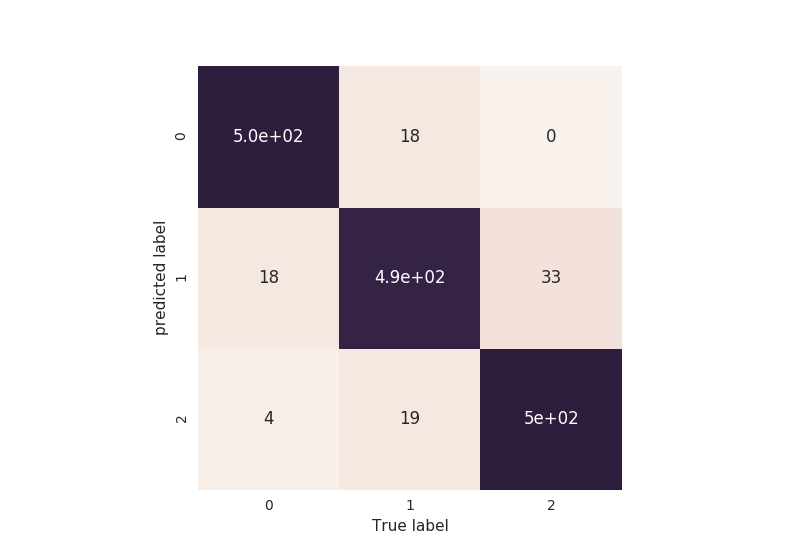

CPU times: user 24.5 s, sys: 35.2 s, total: 59.8 s
Wall time: 18 s


In [66]:
%%time
%run ./Pipeline_PCA_RANDOM_Forest_Copy1_PREDICT.ipynb

In [67]:
filename_prediction_TEST =projectpath+'io/Output/prediction_TEST.npy'
prediction_TEST=np.load(filename_prediction_TEST)

In [68]:
filename_predict_probability=projectpath+'io/Output/predict_probability.npy'
predict_probability=np.load(filename_predict_probability)

<IPython.core.display.Javascript object>


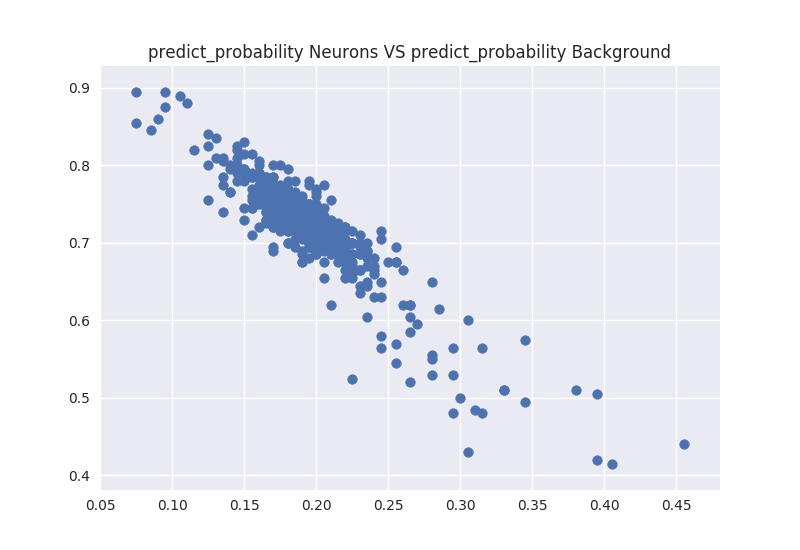

In [69]:
plt.figure()
plt.title('predict_probability Neurons VS predict_probability Background')
plt.scatter(predict_probability[:,1],predict_probability[:,2])

<IPython.core.display.Javascript object>


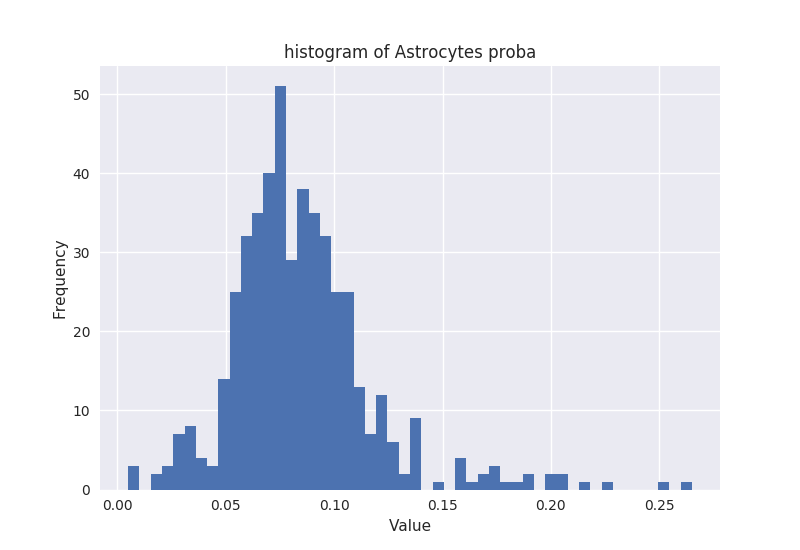

(array([  3.,   0.,   2.,   3.,   7.,   8.,   4.,   3.,  14.,  25.,  32.,
         35.,  40.,  51.,  29.,  38.,  35.,  32.,  25.,  25.,  13.,   7.,
         12.,   6.,   2.,   9.,   0.,   1.,   0.,   4.,   1.,   2.,   3.,
          1.,   1.,   2.,   0.,   2.,   2.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.005 ,  0.0102,  0.0154,  0.0206,  0.0258,  0.031 ,  0.0362,
         0.0414,  0.0466,  0.0518,  0.057 ,  0.0622,  0.0674,  0.0726,
         0.0778,  0.083 ,  0.0882,  0.0934,  0.0986,  0.1038,  0.109 ,
         0.1142,  0.1194,  0.1246,  0.1298,  0.135 ,  0.1402,  0.1454,
         0.1506,  0.1558,  0.161 ,  0.1662,  0.1714,  0.1766,  0.1818,
         0.187 ,  0.1922,  0.1974,  0.2026,  0.2078,  0.213 ,  0.2182,
         0.2234,  0.2286,  0.2338,  0.239 ,  0.2442,  0.2494,  0.2546,
         0.2598,  0.265 ]),
 <a list of 50 Patch objects>)

In [70]:
plt.figure()
plt.title('histogram of Astrocytes proba')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.hist(predict_probability[:,0],bins=50)

In [71]:
# predict_probabiConversion_test_predict_probability=np.reshape(Conversion_test_predict_probability, (-1,3,72))
#%matplotlib notebook

In [72]:
CH1=predict_probability[:,0]
# CH1=np.reshape(CH1, (-1, 76) )
e=len(coords[:1+(x_max-x_min)/int(large/2)])

CH1=np.reshape(CH1, (-1, e) )

CH1=CH1[:,:, np.newaxis]
#     plt.title('Proba Astrocytes')

CH2=predict_probability[:,1]
#CH2=np.reshape(CH2,(-1,76))

CH2=np.reshape(CH2,(-1,e))

CH2=CH2[:,:,np.newaxis]
#     plt.title('Proba Neurons')


CH3=predict_probability[:,2]
#CH3=np.reshape(CH3, (-1, 76) )

CH3=np.reshape(CH3, (-1, e) )

CH3=CH3[:,:,np.newaxis]
#     plt.title('Proba Background')

Z=np.dstack([CH1,CH2,CH3])

In [73]:
filename_RGB_proba_im =projectpath+'io/Output/RGB_proba_im.npy'

In [74]:
np.save(filename_RGB_proba_im,Z)

In [75]:
Z=np.load(filename_RGB_proba_im)

<IPython.core.display.Javascript object>


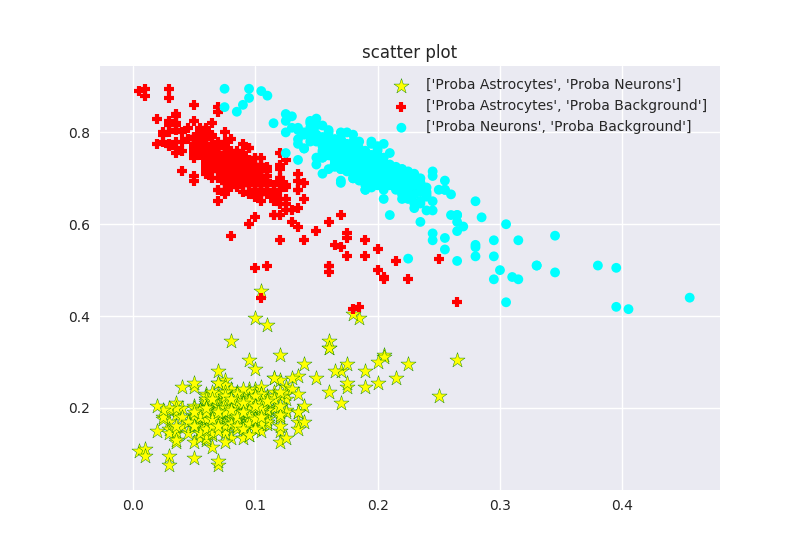

In [76]:
plt.figure()
plt.scatter(Z[:,:,0], Z[:,:,1], s = 130, c = 'yellow', marker = '*', edgecolors = 'green', label=['Proba Astrocytes', 'Proba Neurons'])
plt.scatter(Z[:,:,0], Z[:,:,2], s = 50, c = 'red', marker = '+', linewidth = 3, label=['Proba Astrocytes', 'Proba Background'])
plt.scatter(Z[:,:,1], Z[:,:,2], s = 50, c = 'cyan', marker = 'o', edgecolors = 'none', label=['Proba Neurons', 'Proba Background'])
plt.title('scatter plot')
plt.legend()

In [77]:
conn = BlitzGateway('tbacoyannis','d33pl34rn1ng',port=4064,host='chinensis.polytechnique.fr')
connected = conn.connect()
imageId=451
image = conn.getObject("Image", imageId)
pixels = image.getPrimaryPixels() # get raw pixels information

pxobj_CH1 = pixels.getTile(theZ=103, theC=0, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))
pxobj_CH2 = pixels.getTile(theZ=103, theC=1, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))
pxobj_CH3 = pixels.getTile(theZ=103, theC=2, theT=0, tile=(x_min,y_min, x_max-x_min , y_max-y_min ))

In [78]:
pxobj=(pxobj_CH1+pxobj_CH2+pxobj_CH3)/3

In [79]:
pxobj_=pxobj[:,:,np.newaxis]
pxobj_.shape

(274, 248, 1)

In [80]:
filename_pxobj_ =projectpath+'io/Output/pxobj_.npy'

In [81]:
np.save(filename_pxobj_,pxobj_)

In [83]:
%run ./IM_Display_RGB.ipynb

<IPython.core.display.Javascript object>


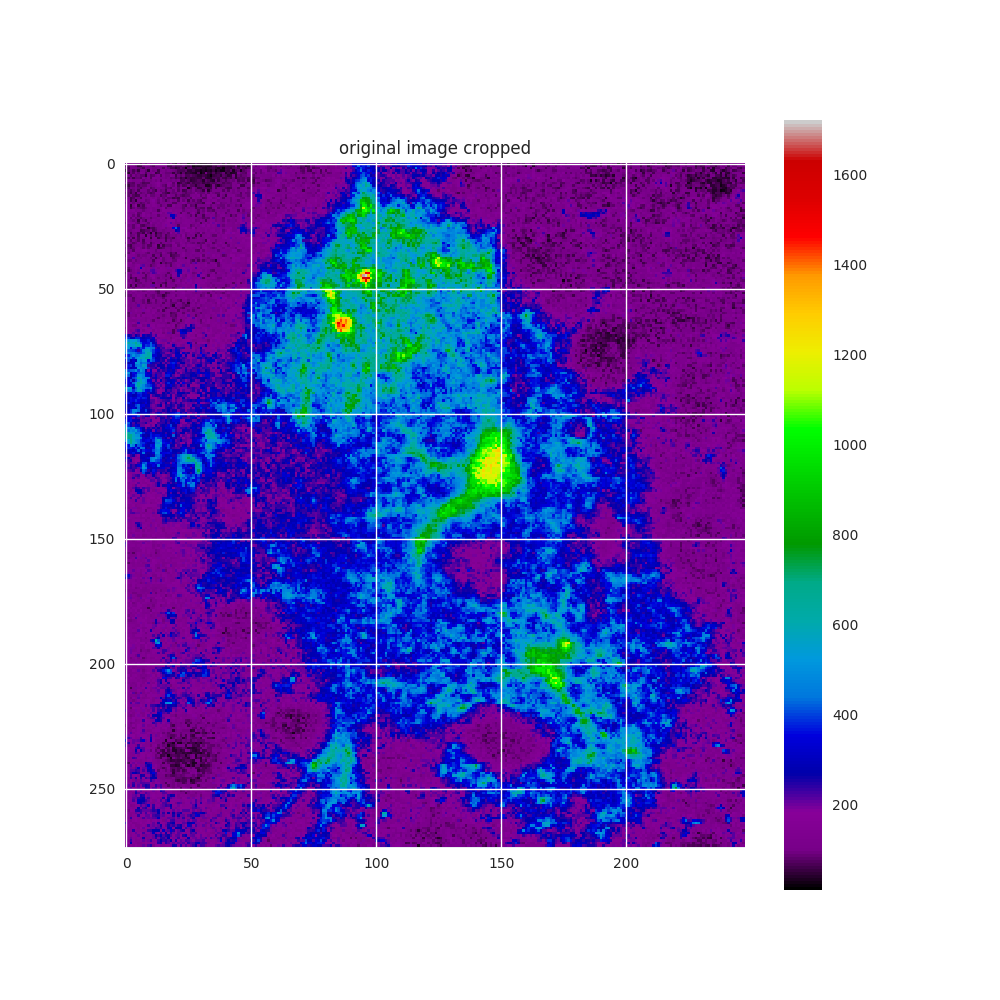

In [86]:
plt.figure(figsize=(10,10))
plt.title('original image cropped')
plt.imshow(pxobj,cmap='spectral')
plt.colorbar()
#plt.imshow(pxobj)

1470L

2946L

In [ ]:
filename_matrixtest_im_real =projectpath+'io/Output/matrixtest_im_real.npy'

In [ ]:
np.save(filename_matrixtest_im_real,matrixtest_im_real)

In [ ]:
matrixtest_im_real=np.load(matrixtest_im_real)

In [ ]:
predict_probability[0:50,:]

In [ ]:
astrocytes_predicted=np.zeros(prediction_TEST.shape[0])
for i in range(0,prediction_TEST.shape[0]):
    if prediction_TEST[i]!=1.0:
        astrocytes_predicted[i]=0

In [ ]:
idx_Astro=np.argwhere(astrocytes_predicted!=0)
idx_Astro=idx_Astro.flatten()

In [ ]:
len(idx_Astro)


In [ ]:
idx_Neuro=np.argwhere(astrocytes_predicted==0)
idx_Neuro=idx_Neuro.flatten()

In [ ]:
len(idx_Neuro)

In [ ]:
plt.imshow(Matrix_TEST[idx_Astro[4]])

In [ ]:
PLOT_Im(Matrix_TEST[idx_Neuro[3]])

In [ ]:
PLOT_Im(Matrix_TEST[idx_Astro[0]])

In [ ]:
lign_nan=np.ones(len(FV_N_TEST))
for i in range(0,len(FV_N_TEST)):
    a=np.isnan(FV_N_TEST[i])
    if np.any(a)==True:
        lign_nan[i]=0

In [ ]:
idx=np.argwhere(lign_nan==1)
idx_new=idx.flatten()

FV_N_TEST=FV_N_TEST[idx_new]

In [ ]:
FV_N_TEST.shape

In [ ]:
np.argwhere(lign_nan==1)
idx_new[4]

In [ ]:
len(idx_Astro)

In [ ]:
Data_FRAMES__test_fct=np.asarray(Data_FRAMES)

In [ ]:
X_coord=np.zeros(Data_FRAMES__test_fct.shape[0])
Y_coord=np.zeros(Data_FRAMES__test_fct.shape[0])
Z_coord=np.zeros(Data_FRAMES__test_fct.shape[0])
for i in range(0,Data_FRAMES__test_fct.shape[0]):
    X_coord[i]=Data_FRAMES__test_fct[i][3:4]
    Y_coord[i]=Data_FRAMES__test_fct[i][4:5]
    Z_coord[i]=Data_FRAMES__test_fct[i][10:11]

In [ ]:
print X_coord
print Y_coord
print Z_coord

In [ ]:
a=np.zeros(Data_FRAMES__test_fct.shape[0])
idx_Astro_test=np.zeros(Data_FRAMES__test_fct.shape[0])
for j in range(0, len(idx_Astro)):
    idx_Astro_test[j]=idx_Astro[j]

for i in range(0,Data_FRAMES__test_fct.shape[0]):
    if X_coord[i]==idx_Astro_test[i]:
        a[i]=1

In [ ]:
np.argwhere(a!=0)


In [ ]:
def corresponding_tiles_original_DF(data_frame, idx_Astrocytes, idx_Neurons, z_stack):
    data_frame=np.asarray(data_frame)
    
    X_coord=np.zeros(data_frame.shape[0])
    Y_coord=np.zeros(data_frame.shape[0])
    Z_coord=np.zeros(data_frame.shape[0])
    for i in range(0,data_frame.shape[0]):
        X_coord[i]=data_frame[i][3:4]
        Y_coord[i]=data_frame[i][4:5]
        Z_coord[i]=data_frame[i][10:11]
    
    